## importing libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading data

In [37]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### checking basic info

In [38]:
data.shape

(150, 5)

In [39]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Classification, dtype: int64

In [40]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [41]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Classification, dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
#checking for null values
for i in ['SL', 'SW', 'PL',]:
    data[i]=data[i].fillna(data[i].median())
    
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [44]:
data.describe() #checking summary of data

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## cheking for outliers

Text(0.5, 1.0, 'SL')

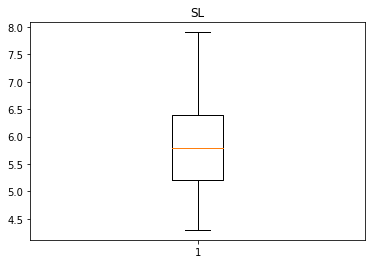

In [45]:
plt.boxplot(data['SL'])
plt.title('SL')

Text(0.5, 1.0, 'SW')

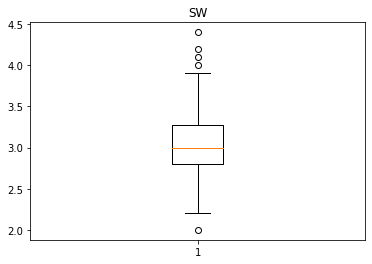

In [46]:
plt.boxplot(data['SW'])
plt.title('SW')

In [47]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
LOW_LIM=Q1-1.5*IQR
UPPER_LIM=Q3+1.5*IQR
LOW_LIM,UPPER_LIM

(2.1249999999999996, 3.9250000000000003)

In [48]:
OUTLIER=[]
for x in data['SW']:
    if (x<LOW_LIM) or (x>UPPER_LIM):
        OUTLIER.append(x)
OUTLIER

[4.0, 4.4, 4.1, 4.2, 2.0]

#### since our data is very small ,not droping outliers 

Text(0.5, 1.0, 'PL')

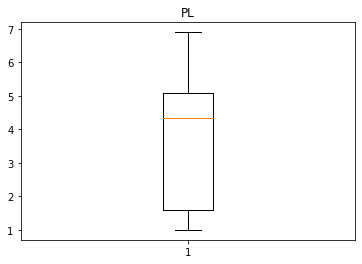

In [49]:
plt.boxplot(data['PL'])
plt.title('PL')

Text(0.5, 1.0, 'PW')

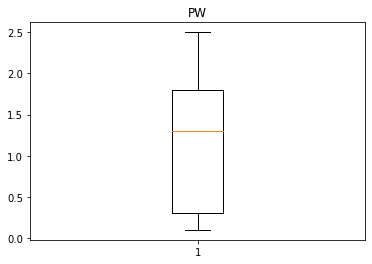

In [50]:
plt.boxplot(data['PW'])
plt.title('PW')

### label_encoding

In [51]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
data['Classification'].value_counts()

2    50
1    50
0    50
Name: Classification, dtype: int64

### splitting dataset

In [54]:
X=data.drop('Classification',axis=1)
Y=data['Classification']

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=.25)

In [56]:
x_train.shape

(112, 4)

In [57]:
y_train.shape

(112,)

## checking which classification model gives the best result to predict iris species
## (Also doing RandomForest)

In [58]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

C:\Users\sarath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
print(f'accuracy is-{accuracy_score(y_test,y_pred)}')
print(f'f1 score is -{f1_score(y_test,y_pred,average=None)}')
confusion_matrix(y_test,y_pred)

accuracy is-0.9736842105263158
f1 score is -[0.96551724 0.95652174 1.        ]


array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [60]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [61]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [62]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
Name: Classification, dtype: int32

In [63]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
print(f'accuracy is-{accuracy_score(y_test,y_pred)}')
print(f'f1 score is -{f1_score(y_test,y_pred,average=None)}')
confusion_matrix(y_test,y_pred)

accuracy is-1.0
f1 score is -[1. 1. 1.]


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [64]:
#gradient boosting method
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
print(f'accuracy is-{accuracy_score(y_test,y_pred)}')
print(f'f1 score is -{f1_score(y_test,y_pred,average=None)}')
confusion_matrix(y_test,y_pred)

accuracy is-1.0
f1 score is -[1. 1. 1.]


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### RandomForest

In [65]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [66]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
print(f'accuracy is-{accuracy_score(y_test,y_pred)}')
print(f'f1 score is -{f1_score(y_test,y_pred,average=None)}')
confusion_matrix(y_test,y_pred)

accuracy is-1.0
f1 score is -[1. 1. 1.]


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

## from the models its clear that decision tree ,gradient boosting and random forest gives the best output 

In [68]:
model.predict([[5.1,3.5,1.4,0.2]])

array([0])